# ReachOut - reaching movement kinematics analysis
___

## This is the Notebook containing all the steps to prepare the video for analysis with DEEPLABCUT and Anipose and then segment and vizualize the trajectories:

### 0. Cut the video from the FLIR camera into three parts - three different views of the reach
We are recording the videos of the reaching task using the single high speed widefield FLIR camera and multiple mirrors, an then cut the single video into parts corresponding to the Leftside view (CamA), Center view (CamB), Rightside view (CamC). This eliminates the need for synchronisation of different videos, but adds this additional step before we can analyze our videos with DLC. 
As a result of this step you should get three video files with the names -camA, -camB, -camC 

### 1. Analyze the video with DeepLabCut
This step is done using the open-source DEEPLABCUT and Anipose packages, so the tutorial and more info on them can be found on GitHub
__[https://github.com/DeepLabCut](DEEPLABCUT)__

It should be further noted that despite the Anipose documentation advice to use single DLC network for all views we found that better results are achieved with two separate networks trained on the side(1) and front(2) view. That means we start DLC analysis for our videos twice - first time for all the CamA/C videos, and the second time for CamB.
As a result we get two separate sets of _*.csv *.h5_ files. For the next step they should be copied together to the Anipose folder

### 2. Triangulate the 2d trajectories with Anipose 
This step is done using the open-source Anipose package, so the tutorial and more info on them can be found on GitHub
__[https://github.com/lambdaloop/anipose](ANIPOSE)__

To get use of Anipose triangulation we manually put the resulting .csv and .h5 files into anipose project folder _*/Anipose project/pose-2d before_ before starting the triangulation command _anipose triangulate_

As a result of this step you should get the single _*.csv_ file for each session, containing the x,y,z coordinates that we will use further  

### 3. Open the csv file, scroll through the trajectories and manually choose the fragments of the trajectory with the reaches for analysis

As a result of this step you will have the _*.h5_ file with the fragments of the trajectory that you've chosen. Open this file to review the trajectories.  

### 4. Open the h5 file and the corresponding video to review and classify the trajectories

For this script to work point it to the _*.h5_ file you want to analyze (file) and the video corresponding to the same session (file2)
As a result of this step you will have the _*.h5_ file which is used in the vizualisation steps 5. and 6.

### 5. Open the scalars.h5 file and plot all the trajectories of the chosen category

### 6. Open the scalars.h5 file and make violin plots for the chosen parameters and reach categories  
  
  
  ***
  ___










# Analysis part
---

#### 0. Cut the video from the FLIR camera 
Note that we have two scripts for two use cases. If you need to process just a single file, type _from video_split import video_split_ and if you want to process all files in a certain folder type _from video_split_folder import video_split_

In [ ]:
# if you want to do bulk analysis on all the files in a folder - uncomment the second line and comment the first one 
#from video_split import video_split           #for single file
from video_split_folder import video_split    #for multiple files

video_split()

#### 1.  Analyze the video with DeepLabCut
The following line should open DLC interface. Open the project containing your trained network, open the analyze video layout and select the videos you want to track (supposedly, either all camA, camB, or camC videos.

In [ ]:
import deeplabcut
deeplabcut.launch_dlc()

Using snapshot-1000000 for model \\pn.vai.org\projects_primary\chu\Daniil Berezhnoi\Python programs\May Networks 2023\Right_mirror-Daniil-2022-09-02\dlc-models\iteration-1\Right_mirrorSep2-trainset95shuffle1


C:\ProgramData\Anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
C:\ProgramData\Anaconda3\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_02_ncb1283-L-camC.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_02_ncb1283-L-camC.mp4
Duration of video [s]:  1913.56 , recorded with  25.0 fps!
Overall # of frames:  47839  found with (before cropping) frame dimensions:  300 408
Starting to extract posture


48278it [04:32, 176.92it/s]                                                                                                                     


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_16_27_08_ncb1403-camC.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_16_27_08_ncb1403-camC.mp4
Duration of video [s]:  3258.96 , recorded with  25.0 fps!
Overall # of frames:  81474  found with (before cropping) frame dimensions:  300 408
Starting to extract posture


82214it [07:33, 181.36it/s]                                                                                                                     


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_16_48_49_ncb1278-L-camC.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_16_48_49_ncb1278-L-camC.mp4
Duration of video [s]:  3356.88 , recorded with  25.0 fps!
Overall # of frames:  83922  found with (before cropping) frame dimensions:  300 408
Starting to extract posture


84739it [07:46, 181.63it/s]                                                                                                                     


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_02_ncb1283-L-camC.mp4
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_16_27_08_ncb1403-camC.mp4
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_16_48_49_ncb1278-L-camC.mp4
Using snapshot-1000000 for model \\pn.vai.org\projects_primary\chu\Daniil Berezhnoi\Python programs\June Networks 2022\Left_Mirr

C:\ProgramData\Anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
C:\ProgramData\Anaconda3\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_14_44_09_ncb1284-R-camA.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_14_44_09_ncb1284-R-camA.mp4
Duration of video [s]:  3085.04 , recorded with  25.0 fps!
Overall # of frames:  77126  found with (before cropping) frame dimensions:  300 408
Starting to extract posture


77871it [07:11, 180.53it/s]                                                                                                                     


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_51_ncb1131-camA.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_51_ncb1131-camA.mp4
Duration of video [s]:  2050.8 , recorded with  25.0 fps!
Overall # of frames:  51270  found with (before cropping) frame dimensions:  300 408
Starting to extract posture


51712it [04:47, 180.15it/s]                                                                                                                     


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_17_41_11_ncb1280-R-camA.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_17_41_11_ncb1280-R-camA.mp4
Duration of video [s]:  3449.88 , recorded with  25.0 fps!
Overall # of frames:  86247  found with (before cropping) frame dimensions:  300 408
Starting to extract posture


87062it [08:02, 180.63it/s]                                                                                                                     


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_14_44_09_ncb1284-R-camA.mp4
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_51_ncb1131-camA.mp4
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_17_41_11_ncb1280-R-camA.mp4
Using snapshot-990000 for model \\pn.vai.org\projects_primary\chu\Daniil Berezhnoi\Python programs\June Networks 2022\Center_Mir

C:\ProgramData\Anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
C:\ProgramData\Anaconda3\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_14_44_09_ncb1284-R-camB.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_14_44_09_ncb1284-R-camB.mp4
Duration of video [s]:  3085.04 , recorded with  25.0 fps!
Overall # of frames:  77126  found with (before cropping) frame dimensions:  824 408
Starting to extract posture


77871it [18:20, 70.76it/s]                                                                                                                      


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_51_ncb1131-camB.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_51_ncb1131-camB.mp4
Duration of video [s]:  2050.8 , recorded with  25.0 fps!
Overall # of frames:  51270  found with (before cropping) frame dimensions:  824 408
Starting to extract posture


51712it [12:07, 71.10it/s]                                                                                                                      


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
Starting to analyze %  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_17_41_11_ncb1280-R-camB.mp4
Loading  \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_17_41_11_ncb1280-R-camB.mp4
Duration of video [s]:  3449.88 , recorded with  25.0 fps!
Overall # of frames:  86247  found with (before cropping) frame dimensions:  824 408
Starting to extract posture


87062it [20:17, 71.49it/s]                                                                                                                      


Saving results in \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_14_44_09_ncb1284-R-camB.mp4
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_15_51_51_ncb1131-camB.mp4
Filtering with median model \\pn.vai.org\projects_primary\chu\Hiba Douja Chehade\Behavior\10wo timepoint video analysis\mj_17_41_11_ncb1280-R-camB.mp4


#### 1.1. Manually track certain points in a video 
The following code opens A simple videoplayer in which you can choose certain frames and label three principal points for triangulation

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


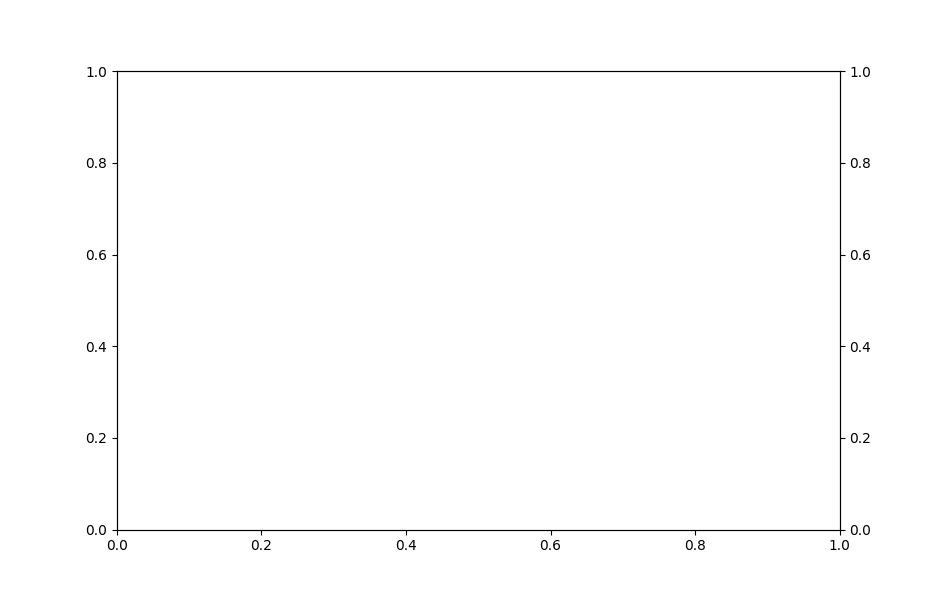

KeyError: "None of [Index(['DLC_resnet50_Right_mirrorSep2shuffle1_1000000', 'finger3', 'x'], dtype='object')] are in the [index]"

In [16]:
# BASIC VISUAL VERIFICATION OF THE 2D COORDINATES

# for more dynamic programs like this one we are switching to the interactive matplotlib backend
import pandas as pd
from tkinter import *
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt

# run the gui to choose file
root = Tk()
root.update()
file = askopenfilename(filetypes =[('DLC Tracking Files', '*.h5')])
root.destroy() 

# open file in pandas and add new values for the reference points
table = pd.read_hdf(file, key = 'df_with_missing')


fig=plt.figure(figsize=(9.4, 6))
axes1 = fig.add_subplot(111)
axes2 = axes1.twinx()
to_plot = table.loc[table.columns[6], table[table.columns[8]]>0.5]
axes1.plot(table[table.columns[6]])
#axes2.plot(p3ds[:, 0, 2])
plt.xlabel("Time (frames)")
plt.ylabel("Coordinate (mm)")
plt.title("x, y, z coordinates of the paw")

#### 2. Triangulate the 2d trajectories with Anipose 
By now this is done outside of the jupyter notebook, because you need to perform several steps, not including the Anipose calibration: <ol> <li>-  manually make an Anipose directory </li>  <li>-  rename the files after DLC analysis, leaving just the *camX* in the end </li> <li>- transfer the .csv and .h5 files with the tracking results to the Anipose directory </li> <li>- *cd* to this directory and </li> <li>- run from the command prompt *anipose triangulate* </li> </ol>

We also provide the 'simpler' way of doing it within the Jupiter Notebook. The following two cells allow to perform the Camera Calibration and Camera Triangulation with the help of AniposeLib. However, you still need to manually make videos for camera calibration and point to them in the first step. The output of this step will be the calibration.toml file with camera extrinsics and intrinsics. The path to this file as well as the path two videos in need for triangulation should be pointed in the second step.

In [ ]:
# CALIBRATING THE CAMERAS

import numpy as np
from aniposelib.boards import CharucoBoard, Checkerboard
from aniposelib.cameras import Camera, CameraGroup
from aniposelib.utils import load_pose2d_fnames

# modify the following lines to match your project
vidnames = [['Anipose Project/2019-08-02/calibration/2-Batch7_6_calibration-camB.mp4'], 
            ['Anipose Project/2019-08-02/calibration/2-Batch7_6_calibration-camC.mp4']]

cam_names = ['B', 'C']

n_cams = len(vidnames)

board = Checkerboard(4, 4,
                     square_length=5,  manually_verify=True) # here, in mm but any unit works
                     


# the videos provided are fisheye, so we need the fisheye option
cgroup = CameraGroup.from_names(cam_names, fisheye=False)

# this will take about 15 minutes (mostly due to detection)
# it will detect the charuco board in the videos,
# then calibrate the cameras based on the detections, using iterative bundle adjustment
cgroup.calibrate_videos(vidnames, board)

# if you need to save and load
# example saving and loading for later
cgroup.dump('calibration.toml')

## example of loading calibration from a file
## you can also load the provided file if you don't want to wait 15 minutes
#cgroup = CameraGroup.load('calibration.toml')

In [5]:
#TRIANGULATING THE ACTUAL COORDINATES WITH THE USE OF CALIBRATION
import pandas as pd
import numpy as np
from aniposelib.boards import CharucoBoard, Checkerboard
from aniposelib.cameras import Camera, CameraGroup
from aniposelib.utils import load_pose2d_fnames
from coord_correct import correct_coordinate_frame, get_median, ortho, proj

#modify the following lines to match your project
output_fname = 'triangle/ncb1280-reaching2.csv'
cgroup = CameraGroup.load('triangle/calibration.toml')
score_threshold = 0.1

# loading data from DLC
fname_dict = {
    'A': 'triangle/mj_15_12_35_ncb1280-R-camA.h5',
    'B': 'triangle/mj_15_12_35_ncb1280-R-camB.h5'
}

d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

n_cams, n_points, n_joints, _ = d['points'].shape
points = d['points']
scores = d['scores']
bodyparts = d['bodyparts']

# remove points that are below threshold
points[scores < score_threshold] = np.nan

points_flat = points.reshape(n_cams, -1, 2)
scores_flat = scores.reshape(n_cams, -1)

p3ds_flat = cgroup.triangulate(points_flat, progress=True)
reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
reprojerr = reprojerr_flat.reshape(n_points, n_joints)

triangulation = False

# This part of the code (if uncommented) is correcting the coordinate frame to match the axes entered and takes
# the reference point as zero, substracting the median of the corresponding column from all points tracked

#triangulation = True
axes = [
    ["x", "starting_point", "pellet"],
    ["y", "starting_point", "border"]
]

reference_point = "pellet"

config=pd.DataFrame(columns=['triangulation'], index=['axes','reference_point'])
config['triangulation']['axes'] = [
    ["x", "starting_point", "pellet"],
    ["y", "starting_point", "border"]
]

config['triangulation']['reference_point'] = "pellet"

###

if triangulation is True:
    all_points_3d_adj, M, center = correct_coordinate_frame(config, p3ds, bodyparts)
else:
    all_points_3d_adj = p3ds
    M = np.identity(3)
    center = np.zeros(3)
    
# concatenating everything in the dataframe and saving to csv   
good_points = ~np.isnan(points[:, :, :, 0])
num_cams = np.sum(good_points, axis=0).astype('float')
scores[~good_points] = 2
scores_3d = np.min(scores, axis=0)


dout = pd.DataFrame()
for bp_num, bp in enumerate(bodyparts):
    for ax_num, axis in enumerate(['x','y','z']):
        dout[bp + '_' + axis] = all_points_3d_adj[:, bp_num, ax_num]
    dout[bp + '_error'] = reprojerr[:, bp_num]
    dout[bp + '_ncams'] = num_cams[:, bp_num]
    dout[bp + '_score'] = scores_3d[:, bp_num]

for i in range(3):
    for j in range(3):
        dout['M_{}{}'.format(i, j)] = M[i, j]

for i in range(3):
    dout['center_{}'.format(i)] = center[i]

dout['fnum'] = np.arange(n_points)

dout.to_csv(output_fname, index=False)


100%|██████████████████████| 471360/471360 [00:25<00:00, 18417.12it/s]


In [ ]:
# BASIC VERIFICATION OF THE COORDINATES
%matplotlib notebook
# for more dynamic programs like this one we are switching to the interactive matplotlib backend

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(9.4, 6))
axes1 = fig.add_subplot(111)
axes2 = axes1.twinx()
#axes1.plot(p3ds[:, 0, 0])
axes1.plot(p3ds[:, 0, 1])
#axes2.plot(p3ds[:, 0, 2])
plt.xlabel("Time (frames)")
plt.ylabel("Coordinate (mm)")
plt.title("x, y, z coordinates of {}".format(bodyparts[0]))

#### 3. Open the csv file, scroll through the trajectories

The following program snippet allows you to open the csv file with Anipose output and scroll through the traejctories, visualizing them as a 3d plot + 2 projections: to X and Y axis. 
**Scroll** by moving the slider at the very bottom. **The 3d plot can be rotated** by howering on top of it with the mouse and holding left button.
Also when you move your mouse to the left lower X-projection plot and hold the left button you can choose the smaller part of the trajectory to visualize with a **span selector**. 
If after close inspection you find this part of the trajectory useful for further analysis (it looks like a valid reach or any other action you are after), you should press the left **Save button** to add it to the resulting output table.
The **Save_all button** on the right saves the resulting table with all the parameters as a *.h5* file for further analysis.

The parameters calculated and added to the table at this step:

Taken from original csv file
* paw_x
* paw_y
* paw_z
* paw_error
* paw_score

Calculated and added as new columns
* dX
* dY
* dZ
* dE
* time
* time_diff
* velocity
* acceleration
* jerk


The resulting *.h5 file contains two keys:
* data - pd dataframe containing the updated data table loaded from csv
* reach_index - list of arrays containing start and stop frame for all the reaches chosen


In [1]:
%matplotlib notebook
# for more dynamic programs like this one we are switching to the interactive matplotlib backend

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
import tracking_split
usecols = ['paw_x','paw_y','paw_z','paw_error','paw_score'] #choose all columns corresponding to the part you analyze
fps = 100                                                   #choose the framerate of your video
length = 500                                                #choose the size of the analysis window
tracking = tracking_split.TrackingViewer(usecols, fps, length, align = False)

<IPython.core.display.Javascript object>


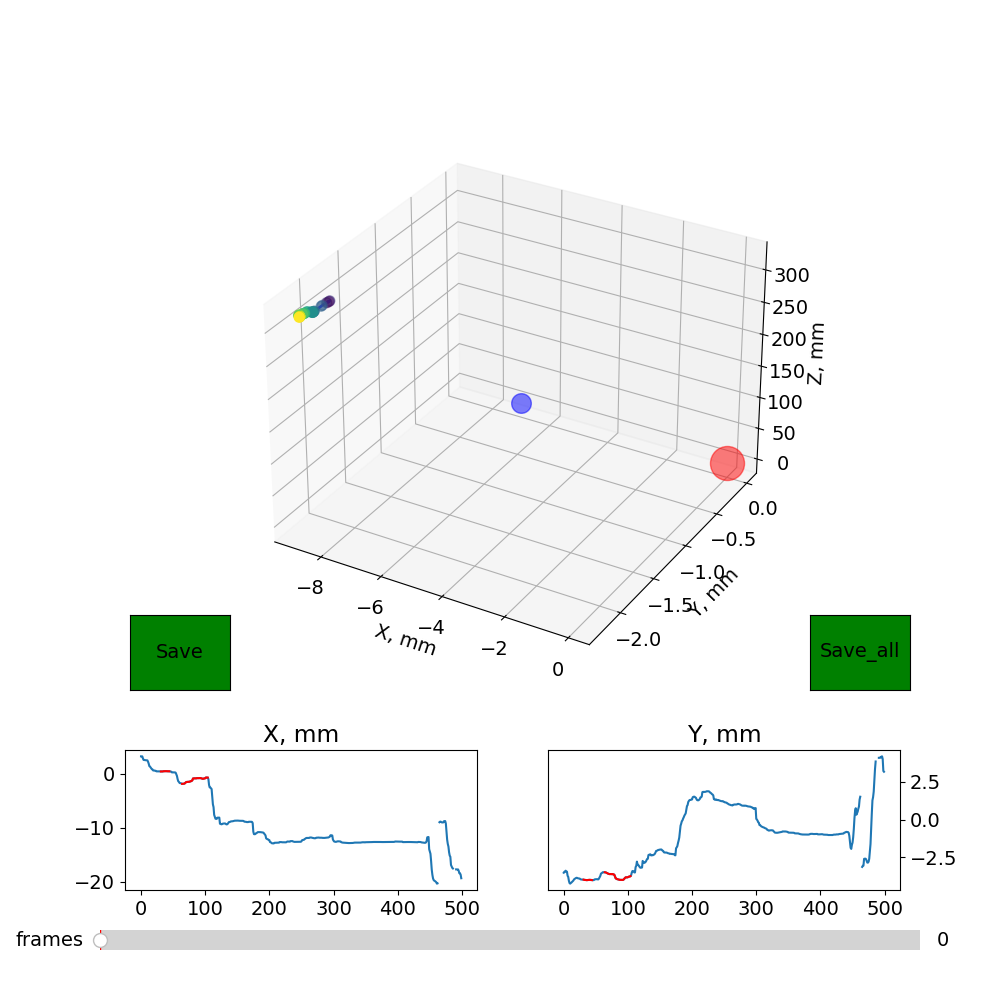

In [4]:
import tracking_split_automatic
usecols = ['paw_x','paw_y','paw_z','paw_error','paw_score'] #choose all columns corresponding to the part you analyze
fps = 100                                                   #choose the framerate of your video
length = 500                                                #choose the size of the analysis window
start = -12                                                 #only reaches from this point are detected (lower border)
thres = -5                                                  #only reaches beyoung this point are detected (upper border)
peak_width = [5,50]                                         #min and max reach duration (in points/frames)

tracking = tracking_split_automatic.TrackingViewer(usecols, fps, length, start, thres, peak_width)

#### 4. Open the h5 file and the corresponding video to review and classify the trajectories
The following program opens the file with all the trajectories saved on the previous step, along with the video file **(the path to both should be typed in the following cell)**
Left dropdown list shows all the reaches with the corresponding frames in a video. As soon as you choose one the popup window will show the corresponding part of the video. To **close the window** type Q on the keyboard. After inspecting the video an accompanying plots **mark the reach** with one of the categories on the right. By default all the reaches are marked as Missed or the last chosen option in the **right list**. As soon as you click on one of the options, the label for the current reach gets updated. When you finish **click Save** to write down the changes to the file. The file is saved with the same name as the input file with added *_scalar.h5* suffix and used in all the visualization steps. 

The parameters calculated for every reach at this step, effectively describing every reach:

* time_difference
* dX
* dY
* dZ
* dE
* maxX
* minX
* min_abs_X
* maxY
* minY
* min_abs_Y
* maxZ
* minZ
* min_abs_Z
* mean_velocity
* mean_acceleration
* mean_jerk
* max_velocity
* max_acceleration
* max_jerk
* max_velocity_position
* maxX_position
* minY_position
* maxZ_position

The resulting *_scalar.h5* file contains four keys:

* cleared_data - pd dataframe, the copy of raw data table with only chosen reaches left, all other timepoints as NaNs 
* reaches - pd dataframe with start and stop position for every reach
* mean - pd dataframe with parameters as columns and reaches as indexes, includes the group column with reach type
* std - similar to mean, pd dataframe with parameters (STDs) as columns and reaches as indexes

In [ ]:
%matplotlib inline 
# for more static programs

In [ ]:
import viewer
directory = 'C:/Users/daniil.berezhnoi.VAI/Desktop/Current Experiments/Ca Imaging/1041/'     #enter the analysis folder
video_filename = 'mj_14_15_59_ncb1041-synced-camB.mp4'                # enter the filename for the video (must be in the same folder)
df_filename = 'ncb1041-reaching1.h5'                 # enter the filename for the dataframe 
options = ['Artefact','Missed', 'In vain', 'Lost', 'Grasped']  # enter the options for labeling
file = directory+video_filename
file2 = directory+df_filename

view = viewer.ReachesViewer(file, file2, options)

# Visualization part
___

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [ ]:
%matplotlib notebook  
# for interactive programs

#### 5. Open the scalars.h5 file and plot all the trajectories of the chosen category
This snippet shows all reaches in the chosen category as Timeseries for visual inspection and analysis. From the lists you can choose the category of reaches and the type of data to plot.

In [ ]:
import reach_view
viewer = reach_view.TimeSeriesViewer()

#### 6. Open the scalars.h5 file and make violin plots for the chosen parameters and reach categories
This snippet shows all the calculated parameters for all reaches in the current session in the form of violin plots. 
The categories to show can be chosen from the left list **(Shift/Ctrl+Click for multiple choise)** and parameters - from the right list.
**Left plot** represents mean for the chosen parameter for every reach (data points).
**Right plot** represents variance for the chosen parameter for every reach (data points).

In [ ]:
import scalar_view
viewer = scalar_view.InteractiveScalarViewer()

In [ ]:
import clustering
columns = ['maxX_mm','minY_mm','maxZ_mm']
cluster_analysis = clustering.Cluster_Analysis(columns=columns, eps = 1.0, clusters = 4, samples = 500, distance = 5)